# Exercício 02
## João Paulo de Melo

Criando um EDA

In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import pylab

In [2]:
df_train = pd.read_csv("./train.csv", parse_dates=['Dates'], index_col='Dates')
df_test = pd.read_csv("./test.csv", parse_dates=['Dates'], index_col='Dates')
df_train.head(5)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Dates,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
df_train.describe(include='all')

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
count,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000
unique,39,879,7,10,17,23228,NaN,NaN
top,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,174900,60022,133734,157182,526790,26533,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020
std,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893
min,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427
50%,NaN,NaN,NaN,NaN,NaN,NaN,-122.416420,37.775421
75%,NaN,NaN,NaN,NaN,NaN,NaN,-122.406959,37.784369


In [4]:
df_test.describe(include='all')

,Id,DayOfWeek,PdDistrict,Address,X,Y
count,884262.000000,884262,884262,884262,884262.000000,884262.000000
unique,NaN,7,10,23184,NaN,NaN
top,NaN,Friday,SOUTHERN,800 Block of BRYANT ST,NaN,NaN
freq,NaN,134703,157456,26984,NaN,NaN
mean,442130.500000,NaN,NaN,NaN,-122.422693,37.771476
std,255264.596206,NaN,NaN,NaN,0.030985,0.484824
min,0.000000,NaN,NaN,NaN,-122.513642,37.707879
25%,221065.250000,NaN,NaN,NaN,-122.433069,37.752374
50%,442130.500000,NaN,NaN,NaN,-122.416517,37.775421
75%,663195.750000,NaN,NaN,NaN,-122.406959,37.784353


In [25]:
dict(map(reversed, enumerate(df_train["Resolution"].unique())))

{'ARREST, BOOKED': 0,
 'NONE': 1,
 'ARREST, CITED': 2,
 'PSYCHOPATHIC CASE': 3,
 'JUVENILE BOOKED': 4,
 'UNFOUNDED': 5,
 'EXCEPTIONAL CLEARANCE': 6,
 'LOCATED': 7,
 'CLEARED-CONTACT JUVENILE FOR MORE INFO': 8,
 'NOT PROSECUTED': 9,
 'JUVENILE DIVERTED': 10,
 'COMPLAINANT REFUSES TO PROSECUTE': 11,
 'JUVENILE ADMONISHED': 12,
 'JUVENILE CITED': 13,
 'DISTRICT ATTORNEY REFUSES TO PROSECUTE': 14,
 'PROSECUTED BY OUTSIDE AGENCY': 15,
 'PROSECUTED FOR LESSER OFFENSE': 16}

In [5]:
categories = df_train["Resolution"].unique()
Resolution_map = {}
for key, crime in enumerate(categories):
    Resolution_map[crime] = key
    
print(Resolution_map)
print("\nQuantidade de Resolutions:",len(categories))

{'ARREST, BOOKED': 0, 'NONE': 1, 'ARREST, CITED': 2, 'PSYCHOPATHIC CASE': 3, 'JUVENILE BOOKED': 4, 'UNFOUNDED': 5, 'EXCEPTIONAL CLEARANCE': 6, 'LOCATED': 7, 'CLEARED-CONTACT JUVENILE FOR MORE INFO': 8, 'NOT PROSECUTED': 9, 'JUVENILE DIVERTED': 10, 'COMPLAINANT REFUSES TO PROSECUTE': 11, 'JUVENILE ADMONISHED': 12, 'JUVENILE CITED': 13, 'DISTRICT ATTORNEY REFUSES TO PROSECUTE': 14, 'PROSECUTED BY OUTSIDE AGENCY': 15, 'PROSECUTED FOR LESSER OFFENSE': 16}

Quantidade de Resolutions: 17


In [6]:
df_train["Resolution_id"] = df_train["Resolution"].map(Resolution_map)

In [7]:
categories = df_train["PdDistrict"].unique()
PdDistrict_map = {}
for key, crime in enumerate(categories):
    PdDistrict_map[crime] = key
    
print(PdDistrict_map)
print("\nQuantidade de distritos:",len(categories))

{'NORTHERN': 0, 'PARK': 1, 'INGLESIDE': 2, 'BAYVIEW': 3, 'RICHMOND': 4, 'CENTRAL': 5, 'TARAVAL': 6, 'TENDERLOIN': 7, 'MISSION': 8, 'SOUTHERN': 9}

Quantidade de distritos: 10


In [8]:
df_train["PdDistrict_id"] = df_train["PdDistrict"].map(PdDistrict_map)

In [9]:
categories = df_train["Category"].unique()
category_map = {}
for key, crime in enumerate(categories):
    category_map[crime] = key
    
print(category_map)
print("\nQuantidade de crimes:",len(categories))

{'WARRANTS': 0, 'OTHER OFFENSES': 1, 'LARCENY/THEFT': 2, 'VEHICLE THEFT': 3, 'VANDALISM': 4, 'NON-CRIMINAL': 5, 'ROBBERY': 6, 'ASSAULT': 7, 'WEAPON LAWS': 8, 'BURGLARY': 9, 'SUSPICIOUS OCC': 10, 'DRUNKENNESS': 11, 'FORGERY/COUNTERFEITING': 12, 'DRUG/NARCOTIC': 13, 'STOLEN PROPERTY': 14, 'SECONDARY CODES': 15, 'TRESPASS': 16, 'MISSING PERSON': 17, 'FRAUD': 18, 'KIDNAPPING': 19, 'RUNAWAY': 20, 'DRIVING UNDER THE INFLUENCE': 21, 'SEX OFFENSES FORCIBLE': 22, 'PROSTITUTION': 23, 'DISORDERLY CONDUCT': 24, 'ARSON': 25, 'FAMILY OFFENSES': 26, 'LIQUOR LAWS': 27, 'BRIBERY': 28, 'EMBEZZLEMENT': 29, 'SUICIDE': 30, 'LOITERING': 31, 'SEX OFFENSES NON FORCIBLE': 32, 'EXTORTION': 33, 'GAMBLING': 34, 'BAD CHECKS': 35, 'TREA': 36, 'RECOVERED VEHICLE': 37, 'PORNOGRAPHY/OBSCENE MAT': 38}

Quantidade de crimes: 39


In [10]:
df_train["Category_id"] = df_train["Category"].map(category_map)

In [11]:
df_train.columns

Index(['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution',
       'Address', 'X', 'Y', 'Resolution_id', 'PdDistrict_id', 'Category_id'],
      dtype='object')

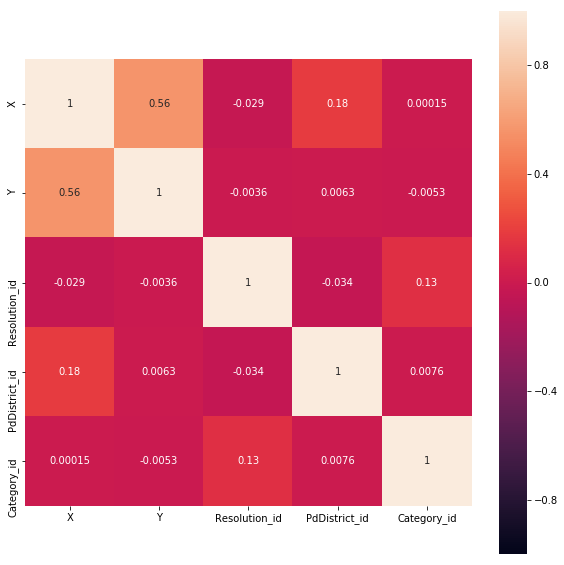

In [12]:
# Matriz de correlação
corr_mat = df_train.corr()

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    corr_mat, 
    annot=True, 
    square=True, 
    vmax=1, 
    vmin=-1
)

In [13]:
#df_train["Category"] = df_train["Category"].map(category_map)

In [14]:
df_train[df_train['Category_id'] != None]

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Resolution_id,PdDistrict_id,Category_id
Dates,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,1
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,0,1
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,1,0,2
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,1,1,2
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,1,2,2
2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,1,2,3
2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,1,3,3
2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,1,4,2


In [15]:
# Modelo de árvores para feature importance
from sklearn.ensemble import RandomForestClassifier

features = ['X','Y','Hour', 'Month', 'Year', 'DayOfMonth', 'PdDistrict_id', 'Resolution_id']

clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5
)

clf.fit(
    df_train[features],
    df_train['Category_id']
)

/home/meia/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


KeyError: "['Hour' 'Month' 'Year' 'DayOfMonth'] not in index"

In [ ]:
clf.feature_importances_

In [ ]:
feat_importances = pd.Series(
    clf.feature_importances_, 
    index=features
)
feat_importances.plot(kind='barh');

In [ ]:
ammount_crimes = df_train["Category"].value_counts()
ammount_crimes

plt.figure(figsize=(30, 10))

sns.set(font_scale=2)
plot = sns.barplot(
    x=ammount_crimes.index, 
    y=ammount_crimes
)
plot.set_xticklabels(ammount_crimes.index,rotation=90)

plt.xlabel('Categoria')
plt.ylabel('Quantidade de crimes')
plt.show()

In [ ]:
df_train['DayOfWeek'] = df_train.index.dayofweek
df_train['Hour'] = df_train.index.hour
df_train['Month'] = df_train.index.month
df_train['Year'] = df_train.index.year
df_train['DayOfMonth'] = df_train.index.day

In [ ]:
pareto_crime = ammount_crimes / sum(ammount_crimes)
pareto_crime = pareto_crime.cumsum()

ammount_crime_analized = 12

Main_Crime_Categories = list(pareto_crime[0:ammount_crime_analized].index)
print("As seguintes categorias: ")
print(Main_Crime_Categories)
print("São responsáveis por {:.2%} dos crimes".format(pareto_crime[ammount_crime_analized]))

In [ ]:
df_train["DayOfWeek"] = df_train["DayOfWeek"].map({
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
})

df_train[["DayOfWeek","Category"]]

In [ ]:
tmp = df_train[["DayOfWeek","Category"]]

sns.set(font_scale=1)
pt = pd.pivot_table(
    tmp,
    index="DayOfWeek",
    columns="Category",
    aggfunc=len,
    fill_value=0
)
ax = pt.loc[df_train["DayOfWeek"].unique(),
       Main_Crime_Categories].plot();
ax.set_xticklabels(['', 'S','T','Q','Q','S','S','D'])
ax.legend(loc=9, bbox_to_anchor=(0.2, -0.2), ncol=2);

In [ ]:
df_train.Year.value_counts().sort_index().plot(kind='bar',title='Crimes by Year');

In [ ]:
space = math.ceil(len(df_train.Year.value_counts().sort_index())/3)

fig, axs = plt.subplots(space, 3, figsize=(20, 20))

year = 0
years = df_train.Year.unique()

years.sort()

for i in range(space):
    for j in range(3):
        df_train[df_train.Year == years[year]].Month.value_counts().sort_index().plot(kind='bar',title=years[year], ax=axs[i][j])
        year += 1
        if year == len(years):
            break 

print("Crimes by month an each year")

In [ ]:
df_train.Hour.value_counts().sort_index().plot(kind='bar', title='Crimes by hour of day');

In [ ]:
mapdata = np.loadtxt("./sf_map_copyright_openstreetmap_contributors.txt")
plt.figure(figsize=(10,10))
plt.imshow(mapdata, cmap = plt.get_cmap('gray'));

In [ ]:
df_train = df_train[(df_train.X != -120.5) & (df_train.Y != 90)]
plt.figure(figsize=(10,10))
plt.plot(df_train.X, df_train.Y,'bo')

In [ ]:
# get rid of bogus lat/long df_train
plt.figure(figsize=(10,10))
df_train = df_train[(df_train.X != -120.5) & (df_train.Y != 90)]
plt.plot(df_train.X,df_train.Y,'bo',label='ALL')
tmp_df = df_train[df_train.Category == 'EMBEZZLEMENT']
plt.plot(tmp_df.X,tmp_df.Y,'go',label='Fraude')
tmp_df = df_train[df_train.Category == 'BRIBERY']
plt.plot(tmp_df.X,tmp_df.Y,'wo',label='Suborno')
plt.legend(frameon=True,numpoints=1,bbox_to_anchor=(1.5,1))